In [ ]:
import pathlib
import pickle
import random
import re
import unicodedata

import pathlib
import pickle
import random
import re
import unicodedata

import tensorflow as tf
import pathlib

import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import time

import pickle

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


# Data Preprocessing Overview

This chart illustrates the structured build-up of the data preprocessing pipeline. Here's how the process unfolds, starting from the base of the pyramid to the top:

1. **Normalization**: Begin with the original sentences from the dataset. Apply normalization techniques such as transforming all text to lowercase and ensuring proper spacing between elements.

2. **Text Vectorization**: Proceed by converting the words (tokens) into numerical representations. This step involves text vectorization, where each unique word is assigned a specific number.

3. **Standardization**: To achieve uniformity across all data inputs, standardize the sentence lengths using zero padding. This ensures that all input data to the model has the same length.

### Preventing Overfitting

To mitigate the risk of overfitting:
- **Word Frequency**: Only words that occur frequently in the dataset are used, reducing the noise from rare words.
- **Token Limit**: Set a maximum number of word tokens per sentence

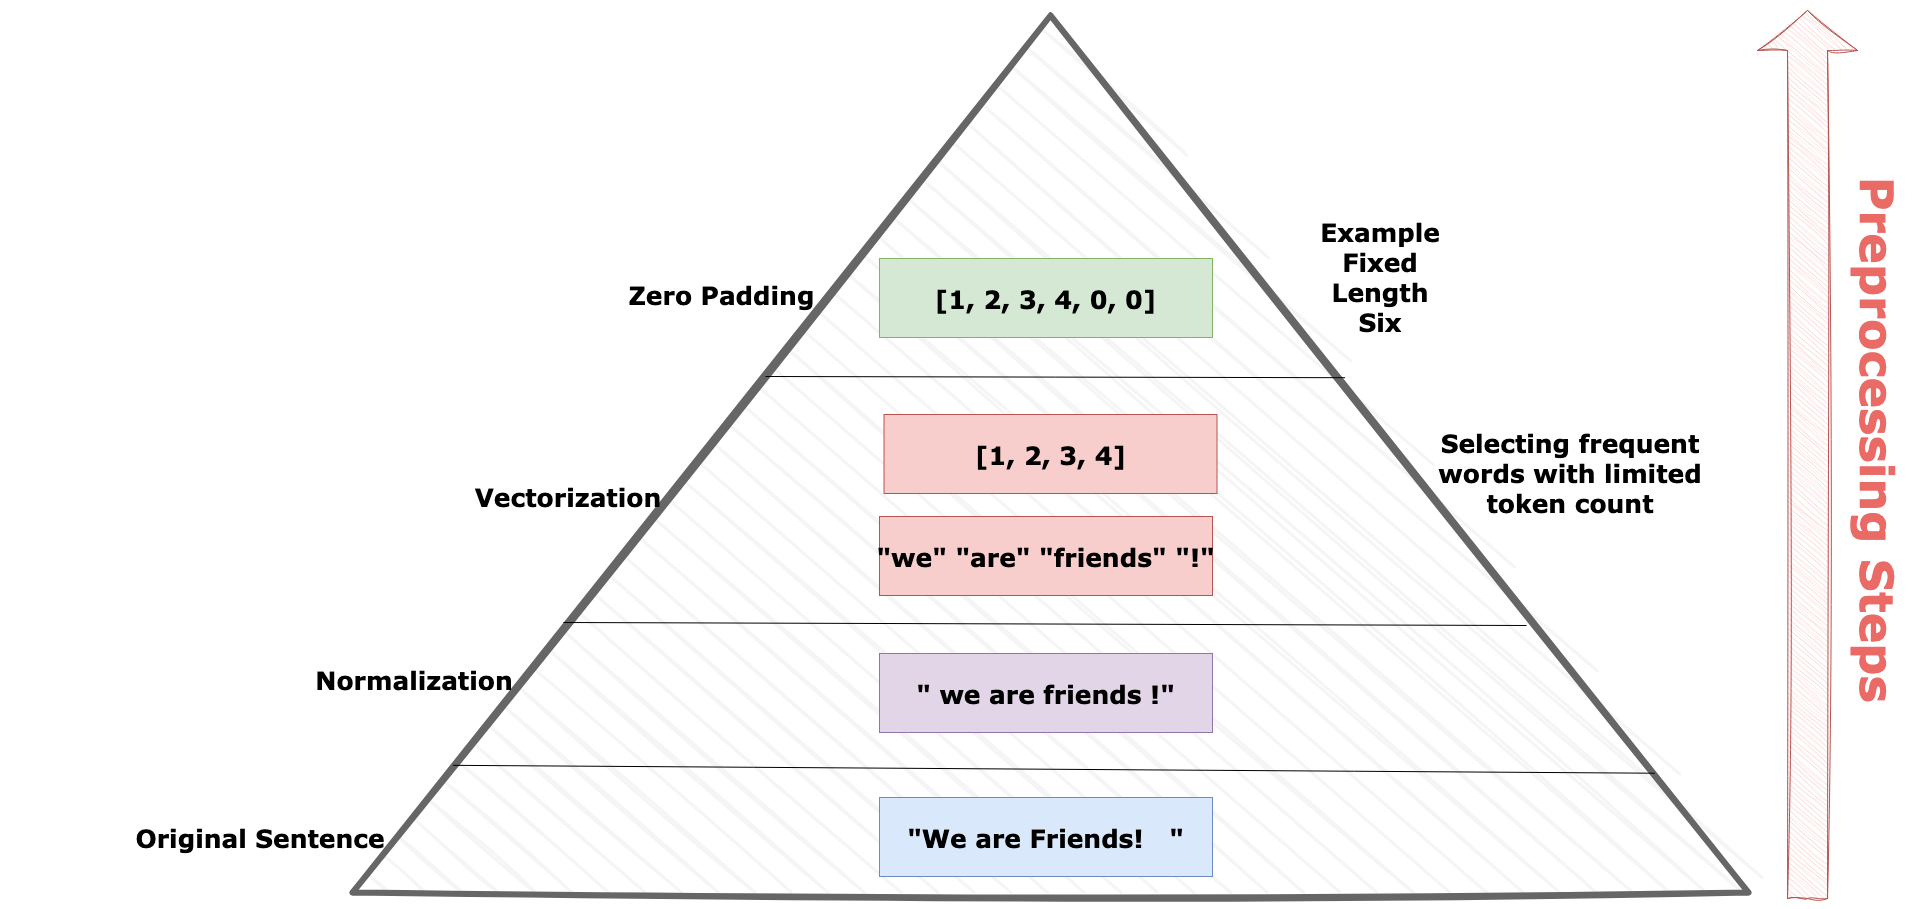

In [ ]:

# download dataset provided by Anki: https://www.manythings.org/anki/
text_file = tf.keras.utils.get_file(
    fname="fra-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract=True,
)
text_file = pathlib.Path(text_file).parent / "fra.txt"

def normalize(line):
    """Normalize a line of text and split into two at the tab character"""
    line = unicodedata.normalize("NFKC", line.strip().lower())
    # Simplified regex to add spaces around non-word characters except for spaces
    line = re.sub(r"([^\w\s])", r" \1 ", line)
    # Split the line into English and French parts
    eng, fra = line.split("\t")
    # Add start and end tokens to the French sentence
    fra = "[start] " + fra + " [end]"
    return eng, fra


# normalize each line and separate into English and French
with open(text_file) as fp:
    text_pairs = [normalize(line) for line in fp]
print("Total Amount of Pairs: ", len(text_pairs))
# print some samples
for _ in range(5):
    print(random.choice(text_pairs))

with open("text_pairs.pickle", "wb") as fp:
    pickle.dump(text_pairs, fp)

3423204/3423204 [==============================] - 1s 0us/step
Total Amount of Pairs:  167130
('do you know who took the call ? ', "[start] savez - vous qui a pris l ' appel  ?  [end]")
('they relaxed on the beach . ', '[start] ils se détendirent sur la plage .  [end]')
("he won ' t be pleased . ", '[start] ça ne va pas lui plaire .  [end]')
('i really do need your help . ', "[start] j ' ai vraiment besoin de votre aide .  [end]")
('i found the man i want to marry . ', "[start] j ' ai trouvé l ' homme que je veux épouser .  [end]")


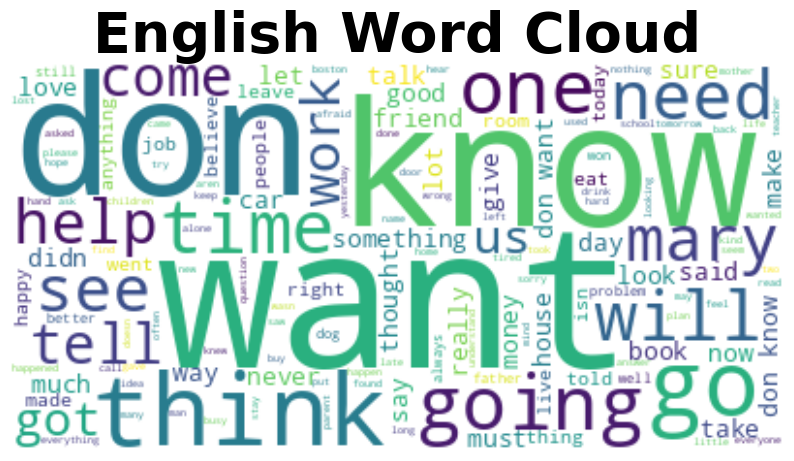

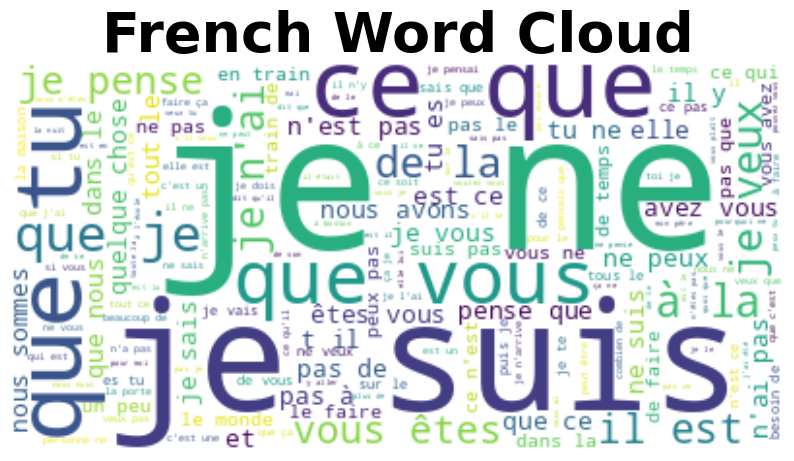

In [ ]:
############### WORD CLOUD  ###############################
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image


cleaned_text_pairs = [(eng, fra.replace("[start] ", "").replace(" [end]", "")) for eng, fra in text_pairs]

# Now, filter out the pairs where both English and French parts don't have exactly 4 words
filtered_text_pairs = [pair for pair in cleaned_text_pairs if len(pair[0].split()) >= 4 and len(pair[1].split()) >= 4]

def clean_text(text, word_to_remove="tom"):
    # Handle specific case of apostrophes in contractions in English
    text = re.sub(r"\b(re|ve|ll|t|d|m|s)\b", '', text)
    # Remove single characters and extra spaces
    text = re.sub(r"\b[a-zA-Z]\b", '', text)
    text = re.sub(r"\s+", ' ', text)
    # Remove the specific word
    text = re.sub(rf"\b{word_to_remove}\b", '', text, flags=re.IGNORECASE)
    return text.strip()

def clean_french(text, word_to_remove="tom"):
    # Replace space around the apostrophe with nothing, effectively joining the words
    text = re.sub(r"\s+\'\s+", "'", text)
    # Remove the specific word
    text = re.sub(rf"\b{word_to_remove}\b", '', text, flags=re.IGNORECASE)
    return text.strip()

# Use filtered_text_pairs for the word cloud generation
english_text = ' '.join([clean_text(pair[0]) for pair in filtered_text_pairs])
french_text = ' '.join([clean_french(pair[1]) for pair in filtered_text_pairs])

# Generate a word cloud image for English text
wordcloud_eng = WordCloud(background_color='white').generate(english_text)

# Display the generated English word cloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_eng, interpolation='bilinear')
plt.axis("off")
plt.title("English Word Cloud", fontsize=40, fontweight='bold')
plt.show()

# Generate a word cloud image for French text
wordcloud_fra = WordCloud(background_color='white').generate(french_text)

# Display the generated French word cloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_fra, interpolation='bilinear')
plt.axis("off")
plt.title("French Word Cloud", fontsize=40, fontweight='bold')
plt.show()








############### WORD CLOUD  ###############################

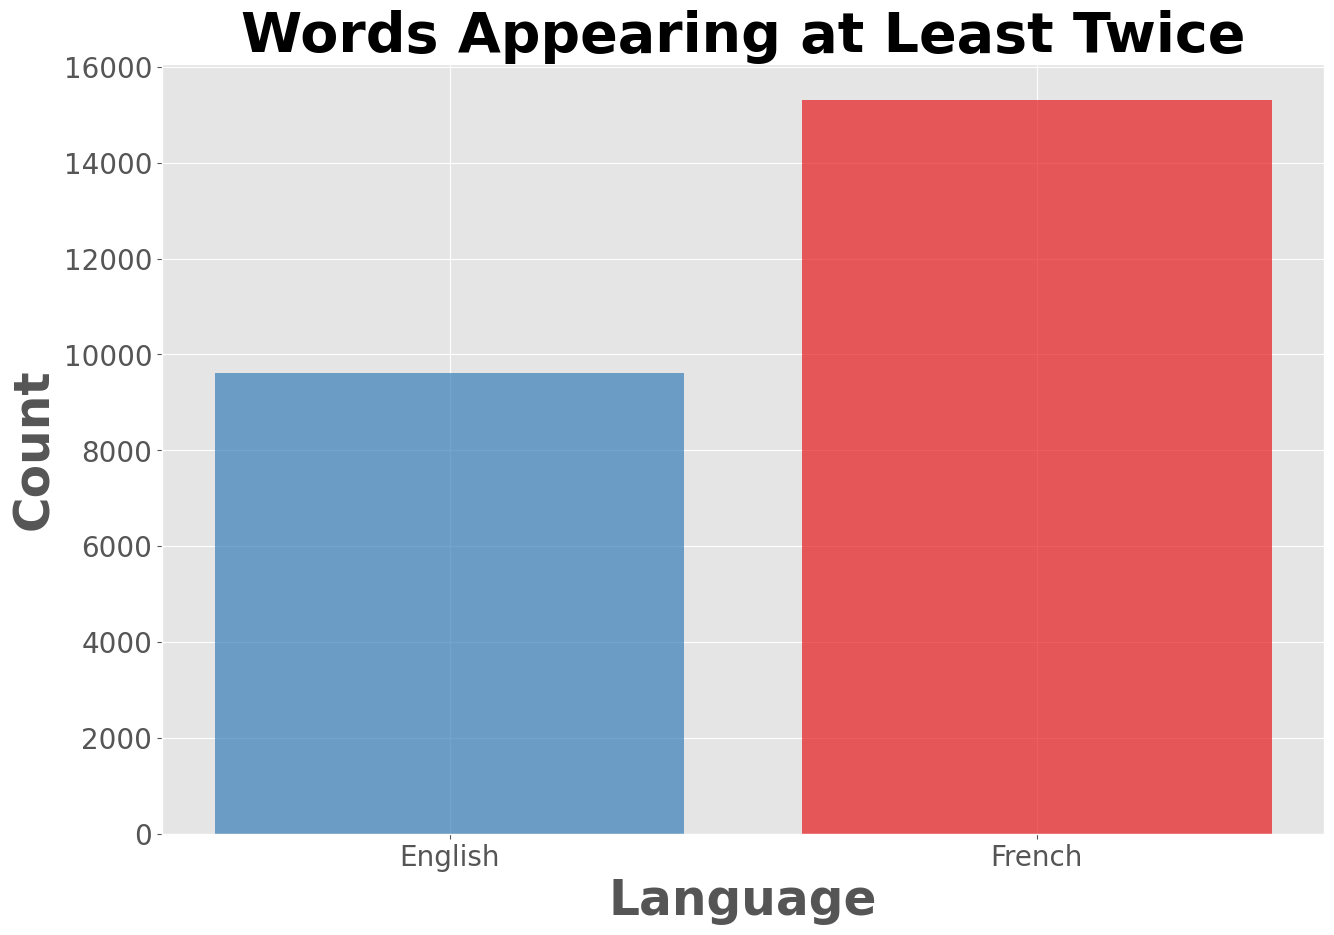

In [ ]:
# Load and normalize the dataset
with open(text_file, encoding='utf-8') as file:
    lines = file.readlines()
    text_pairs = [line for line in lines]

# Separate English and French texts
english_texts, french_texts = zip(*text_pairs)

# Count word occurrences
english_word_counts = collections.Counter(' '.join(english_texts).split())
french_word_counts = collections.Counter(' '.join(french_texts).split())

# Filter words that appear at least twice
english_words_at_least_twice = {word: count for word, count in english_word_counts.items() if count >= 2}
french_words_at_least_twice = {word: count for word, count in french_word_counts.items() if count >= 2}

# Assuming we have the counts of words appearing at least twice
num_english_words = len(english_words_at_least_twice)
num_french_words = len(french_words_at_least_twice)

# Data for plotting
languages = ['English', 'French']
counts = [num_english_words, num_french_words]

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

colors = ['#377eb8', '#e41a1c']  # These hex codes are typical for ggplot's blue and red

# Bar chart
plt.bar(languages, counts,color = colors, alpha=0.7)

plt.title('Words Appearing at Least Twice', fontsize=40, fontweight='bold')
plt.xlabel('Language', fontsize=35, fontweight='bold')
plt.ylabel('Count', fontsize=35, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



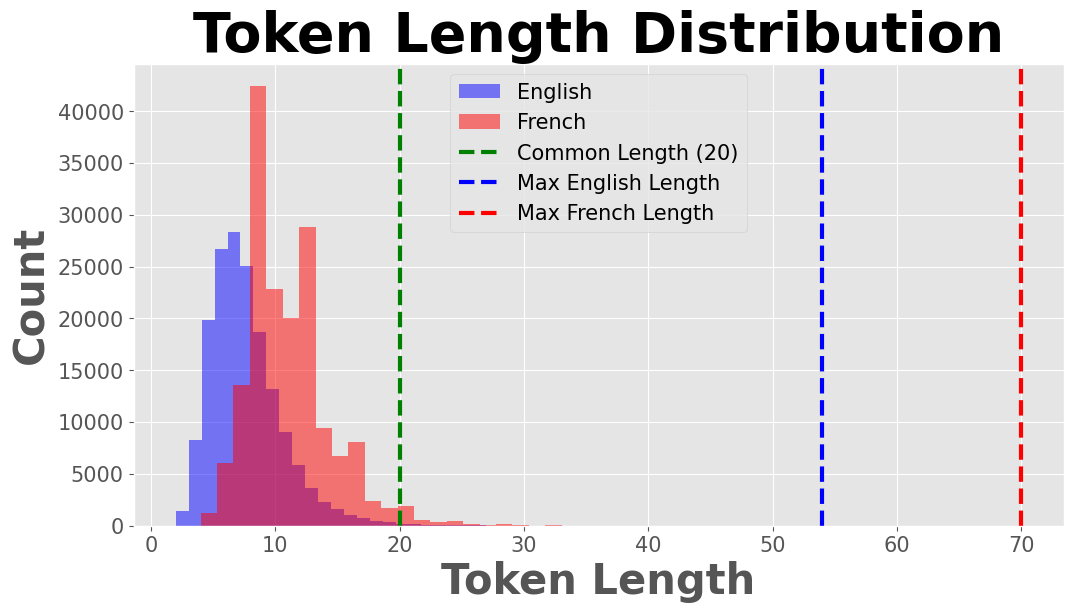

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Assuming text_pairs.pickle contains the English and French sentence pairs
with open("text_pairs.pickle", "rb") as fp:
    text_pairs = pickle.load(fp)

# Extract English and French sentences
english_sentences, french_sentences = zip(*text_pairs)

# Tokenize the sentences and count the number of tokens
token_lengths_eng = [len(sentence.split()) for sentence in english_sentences]
token_lengths_fr = [len(sentence.split()) for sentence in french_sentences]

# Set the font size globally

# Plotting the distribution of token lengths
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.hist(token_lengths_eng, bins=50, alpha=0.5, label='English', color='blue')
plt.hist(token_lengths_fr, bins=50, alpha=0.5, label='French', color='red')
plt.axvline(x=20, color='green', linestyle='dashed', linewidth=3, label='Common Length (20)')
plt.axvline(x=max(token_lengths_eng), color='blue', linestyle='dashed', linewidth=3,  label='Max English Length')
plt.axvline(x=max(token_lengths_fr), color='red', linestyle='dashed',  linewidth=3,  label='Max French Length')

# Setting titles and labels with specific font size and weight
plt.title('Token Length Distribution', fontsize=60, fontweight='bold')
plt.xlabel('Token Length', fontsize=30, fontweight='bold')
plt.ylabel('Count', fontsize=30, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=15)


plt.title('Token Length Distribution', fontweight = 'bold', fontsize=40)
plt.xlabel('Token Length', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.legend(loc='upper center',fontsize=15)
plt.show()






In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization

# Load normalized sentence pairs
with open("text_pairs.pickle", "rb") as fp:
    text_pairs = pickle.load(fp)

# train-test-val split of randomized sentence pairs
train_pairs, temp_pairs = train_test_split(text_pairs, test_size=0.3, random_state=42)
val_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.5, random_state=42)

# Parameter determined after analyzing the input data
vocab_size_en = 10000
vocab_size_fr = 16000
seq_length = 20

# Create vectorizer
eng_vectorizer = TextVectorization(
    max_tokens=vocab_size_en,
    standardize=None,
    split="whitespace",
    output_mode="int",
    output_sequence_length=seq_length,
)
fra_vectorizer = TextVectorization(
    max_tokens=vocab_size_fr,
    standardize=None,
    split="whitespace",
    output_mode="int",
    output_sequence_length=seq_length + 1
)

# train the vectorization layer using training dataset
train_eng_texts = [pair[0] for pair in train_pairs]
train_fra_texts = [pair[1] for pair in train_pairs]
eng_vectorizer.adapt(train_eng_texts)
fra_vectorizer.adapt(train_fra_texts)

# save for subsequent steps
with open("vectorize.pickle", "wb") as fp:
    data = {
        "train": train_pairs,
        "val":   val_pairs,
        "test":  test_pairs,
        "engvec_config":  eng_vectorizer.get_config(),
        "engvec_weights": eng_vectorizer.get_weights(),
        "fravec_config":  fra_vectorizer.get_config(),
        "fravec_weights": fra_vectorizer.get_weights(),
    }
    pickle.dump(data, fp)


In [ ]:

# load text data and vectorizer weights
with open("vectorize.pickle", "rb") as fp:
    data = pickle.load(fp)

train_pairs = data["train"]
val_pairs = data["val"]
test_pairs = data["test"]

eng_vectorizer = TextVectorization.from_config(data["engvec_config"])
eng_vectorizer.set_weights(data["engvec_weights"])
fra_vectorizer = TextVectorization.from_config(data["fravec_config"])
fra_vectorizer.set_weights(data["fravec_weights"])

# set up Dataset object
def format_dataset(eng, fra):
    """Take an English and a French sentence pair, convert into input and target.
    The input is a dict with keys `encoder_inputs` and `decoder_inputs`, each
    is a vector, corresponding to English and French sentences respectively.
    The target is also vector of the French sentence, advanced by 1 token. All
    vector are in the same length.

    The output will be used for training the transformer model. In the model we
    will create, the input tensors are named `encoder_inputs` and `decoder_inputs`
    which should be matched to the keys in the dictionary for the source part
    """
    eng = eng_vectorizer(eng)
    fra = fra_vectorizer(fra)
    source = {"encoder_inputs": eng,
              "decoder_inputs": fra[:, :-1]}
    target = fra[:, 1:]
    return (source, target)

def make_dataset(pairs, batch_size=64):
    """Create TensorFlow Dataset for the sentence pairs"""
    # aggregate sentences using zip(*pairs)
    eng_texts, fra_texts = zip(*pairs)
    # convert them into list, and then create tensors
    dataset = tf.data.Dataset.from_tensor_slices((list(eng_texts), list(fra_texts)))
    return dataset.shuffle(2048) \
                  .batch(batch_size).map(format_dataset) \
                  .prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)
test_ds = make_dataset(test_pairs)

# test the dataset
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["encoder_inputs"][0]: {inputs["encoder_inputs"][0]}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"][0]: {inputs["decoder_inputs"][0]}')
    print(f"targets.shape: {targets.shape}")
    print(f"targets[0]: {targets[0]}")

inputs["encoder_inputs"].shape: (64, 20)
inputs["encoder_inputs"][0]: [   4  113   46 1564    2    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
inputs["decoder_inputs"].shape: (64, 20)
inputs["decoder_inputs"][0]: [   2    6   34   51 4401    4    3    0    0    0    0    0    0    0
    0    0    0    0    0    0]
targets.shape: (64, 20)
targets[0]: [   6   34   51 4401    4    3    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


## Building the Transformer Model

In [ ]:


def pos_enc_matrix(L, d, n=10000):
    """Create positional encoding matrix

    Args:
        L: Input dimension (length)
        d: Output dimension (depth), even only
        n: Constant for the sinusoidal functions

    Returns:
        numpy matrix of floats of dimension L-by-d. At element (k,2i) the value
        is sin(k/n^(2i/d)) while at element (k,2i+1) the value is cos(k/n^(2i/d))
    """
    assert d % 2 == 0, "Output dimension needs to be an even integer"
    d2 = d//2
    P = np.zeros((L, d))
    k = np.arange(L).reshape(-1, 1)     # L-column vector
    i = np.arange(d2).reshape(1, -1)    # d-row vector
    denom = np.power(n, -i/d2)          # n**(-2*i/d)
    args = k * denom                    # (L,d) matrix
    P[:, ::2] = np.sin(args)
    P[:, 1::2] = np.cos(args)
    return P

class PositionalEmbedding(tf.keras.layers.Layer):
    """Positional embedding layer. Assume tokenized input, transform into
    embedding and returns positional-encoded output."""
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        """
        Args:
            sequence_length: Input sequence length
            vocab_size: Input vocab size, for setting up embedding matrix
            embed_dim: Embedding vector size, for setting up embedding matrix
        """
        super().__init__(**kwargs)
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim     # d_model in paper
        # token embedding layer: Convert integer token to D-dim float vector
        self.token_embeddings = tf.keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim, mask_zero=True
        )
        # positional embedding layer: a matrix of hard-coded sine values
        matrix = pos_enc_matrix(sequence_length, embed_dim)
        self.position_embeddings = tf.constant(matrix, dtype="float32")

    def call(self, inputs):
        """Input tokens convert into embedding vectors then superimposed
        with position vectors"""
        embedded_tokens = self.token_embeddings(inputs)
        return embedded_tokens + self.position_embeddings

    # this layer is using an Embedding layer, which can take a mask
    # see https://www.tensorflow.org/guide/keras/masking_and_padding#passing_mask_tensors_directly_to_layers
    def compute_mask(self, *args, **kwargs):
        return self.token_embeddings.compute_mask(*args, **kwargs)

    def get_config(self):
        # to make save and load a model using custom layer possible
        config = super().get_config()
        config.update({
            "sequence_length": self.sequence_length,
            "vocab_size": self.vocab_size,
            "embed_dim": self.embed_dim,
        })
        return config


def self_attention(input_shape, prefix="att", mask=False, **kwargs):

    # create layers
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in1")
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_attn1", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm1")
    add = tf.keras.layers.Add(name=f"{prefix}_add1")
    # functional API to connect input to output
    attout = attention(query=inputs, value=inputs, key=inputs,
                       use_causal_mask=mask)
    outputs = norm(add([inputs, attout]))
    # create model and return
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f"{prefix}_att")
    return model

seq_length = 20
key_dim = 128
num_heads = 8

model = self_attention(input_shape=(seq_length, key_dim),
                       num_heads=num_heads, key_dim=key_dim)


def cross_attention(input_shape, context_shape, prefix="att", **kwargs):
    """Cross-attention layers at transformer decoder. Assumes its
    input is the output from positional encoding layer at decoder
    and context is the final output from encoder.

    Args:
        prefix (str): The prefix added to the layer names
    """
    # create layers
    context = tf.keras.layers.Input(shape=context_shape, dtype='float32',
                                    name=f"{prefix}_ctx2")
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in2")
    attention = tf.keras.layers.MultiHeadAttention(name=f"{prefix}_attn2", **kwargs)
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm2")
    add = tf.keras.layers.Add(name=f"{prefix}_add2")
    # functional API to connect input to output
    attout = attention(query=inputs, value=context, key=context)
    outputs = norm(add([attout, inputs]))
    # create model and return
    model = tf.keras.Model(inputs=[(context, inputs)], outputs=outputs,
                           name=f"{prefix}_cross")
    return model

seq_length = 20
key_dim = 128
num_heads = 8

model = cross_attention(input_shape=(seq_length, key_dim),
                        context_shape=(seq_length, key_dim),
                        num_heads=num_heads, key_dim=key_dim)

def feed_forward(input_shape, model_dim, ff_dim, dropout=0.1, prefix="ff"):
    """Feed-forward layers at transformer encoder and decoder. Assumes its
    input is the output from an attention layer with add & norm, the output
    is the output of one encoder or decoder block

    Args:
        model_dim (int): Output dimension of the feed-forward layer, which
                         is also the output dimension of the encoder/decoder
                         block
        ff_dim (int): Internal dimension of the feed-forward layer
        dropout (float): Dropout rate
        prefix (str): The prefix added to the layer names
    """
    # create layers
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in3")
    dense1 = tf.keras.layers.Dense(ff_dim, name=f"{prefix}_ff1", activation="relu")
    dense2 = tf.keras.layers.Dense(model_dim, name=f"{prefix}_ff2")
    drop = tf.keras.layers.Dropout(dropout, name=f"{prefix}_drop")
    add = tf.keras.layers.Add(name=f"{prefix}_add3")
    # functional API to connect input to output
    ffout = drop(dense2(dense1(inputs)))
    norm = tf.keras.layers.LayerNormalization(name=f"{prefix}_norm3")
    outputs = norm(add([inputs, ffout]))
    # create model and return
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f"{prefix}_ff")
    return model

seq_length = 20
key_dim = 128
ff_dim = 512

model = feed_forward(input_shape=(seq_length, key_dim),
                     model_dim=key_dim, ff_dim=ff_dim)

# the building block functions from Lesson 06

def encoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix="enc", **kwargs):
    """One encoder unit. The input and output are in the same shape so we can
    daisy chain multiple encoder units into one larger encoder"""
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prefix}_in0"),
        self_attention(input_shape, prefix=prefix, key_dim=key_dim, mask=False, **kwargs),
        feed_forward(input_shape, key_dim, ff_dim, dropout, prefix),
    ], name=prefix)
    return model


seq_length = 20
key_dim = 128
ff_dim = 512
num_heads = 8

model = encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim,
                num_heads=num_heads)

# the three building block functions from Lesson 06

def decoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix="dec", **kwargs):
    """One decoder unit. The input and output are in the same shape so we can
    daisy chain multiple decoder units into one larger decoder. The context
    vector is also assumed to be the same shape for convenience"""
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                   name=f"{prefix}_in0")
    context = tf.keras.layers.Input(shape=input_shape, dtype='float32',
                                    name=f"{prefix}_ctx0")
    attmodel = self_attention(input_shape, key_dim=key_dim, mask=True,
                              prefix=prefix, **kwargs)
    crossmodel = cross_attention(input_shape, input_shape, key_dim=key_dim,
                                 prefix=prefix, **kwargs)
    ffmodel = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix)
    x = attmodel(inputs)
    x = crossmodel([(context, x)])
    output = ffmodel(x)
    model = tf.keras.Model(inputs=[(inputs, context)], outputs=output, name=prefix)
    return model


seq_length = 20
key_dim = 128
ff_dim = 512
num_heads = 8

model = decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim,
                num_heads=num_heads)

def transformer(num_layers, num_heads, seq_len, key_dim, ff_dim, vocab_size_src,
                vocab_size_tgt, dropout=0.1, name="transformer"):
    embed_shape = (seq_len, key_dim)  # output shape of the positional embedding layer
    # set up layers
    input_enc = tf.keras.layers.Input(shape=(seq_len,), dtype="int32",
                                      name="encoder_inputs")
    input_dec = tf.keras.layers.Input(shape=(seq_len,), dtype="int32",
                                      name="decoder_inputs")
    embed_enc = PositionalEmbedding(seq_len, vocab_size_src, key_dim, name="embed_enc")
    embed_dec = PositionalEmbedding(seq_len, vocab_size_tgt, key_dim, name="embed_dec")
    encoders = [encoder(input_shape=embed_shape, key_dim=key_dim,
                        ff_dim=ff_dim, dropout=dropout, prefix=f"enc{i}",
                        num_heads=num_heads)
                for i in range(num_layers)]
    decoders = [decoder(input_shape=embed_shape, key_dim=key_dim,
                        ff_dim=ff_dim, dropout=dropout, prefix=f"dec{i}",
                        num_heads=num_heads)
                for i in range(num_layers)]
    final = tf.keras.layers.Dense(vocab_size_tgt, name="linear")
    # build output
    x1 = embed_enc(input_enc)
    x2 = embed_dec(input_dec)
    for layer in encoders:
        x1 = layer(x1)
    for layer in decoders:
        x2 = layer([x2, x1])
    output = final(x2)
    # XXX keep this try-except block
    try:
        del output._keras_mask
    except AttributeError:
        pass
    model = tf.keras.Model(inputs=[input_enc, input_dec], outputs=output, name=name)
    return model


seq_len = 20
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = 0.1
vocab_size_en = 10000
vocab_size_fr = 20000
model = transformer(num_layers, num_heads, seq_len, key_dim, ff_dim,
                    vocab_size_en, vocab_size_fr, dropout)

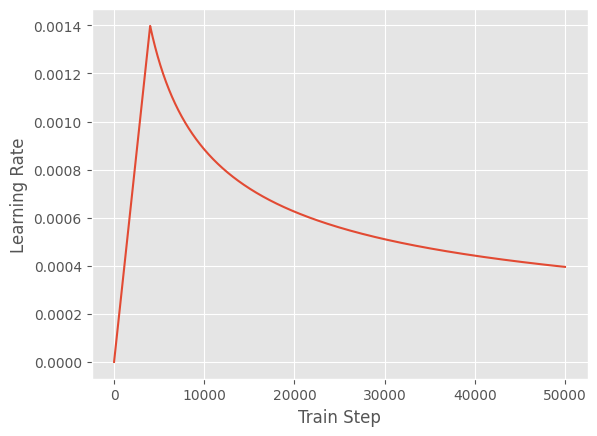

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    "Custom learning rate for Adam optimizer"
    def __init__(self, key_dim, warmup_steps=4000):
        super().__init__()
        self.key_dim = key_dim
        self.warmup_steps = warmup_steps
        self.d = tf.cast(self.key_dim, tf.float32)

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        # to make save and load a model using custom layer possible0
        config = {
            "key_dim": self.key_dim,
            "warmup_steps": self.warmup_steps,
        }
        return config

key_dim = 128
lr = CustomSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

plt.plot(lr(tf.range(50000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')
plt.show()

In [ ]:
def masked_loss(label, pred):
    mask = label != 0

    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
    return loss


def masked_accuracy(label, pred):
    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0

    match = match & mask

    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

# Fine Tuning Model

In [ ]:
vocab_size_en = 10000
vocab_size_fr = 16000
seq_len = 20
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = 0.1
model = transformer(num_layers, num_heads, seq_len, key_dim, ff_dim,
                    vocab_size_en, vocab_size_fr, dropout)
lr = CustomSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
model.compile(loss=masked_loss, optimizer=optimizer, metrics=[masked_accuracy])
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, 20)]                 0         []                            
 )                                                                                                
                                                                                                  
 embed_enc (PositionalEmbed  (None, 20, 128)              1280000   ['encoder_inputs[0][0]']      
 ding)                                                                                            
                                                                                                  
 enc0 (Sequential)           (None, 20, 128)              659712    ['embed_enc[0][0]']           
                                                                                        

## Training the Transformer Models



In the following code, we train the following models to be able to compare accuracy and runtimes:



*   seq-to-seq RNN
*   seq-to-seq LSTM
*   Transformer







In [ ]:
# Create and train the model
seq_len = 20
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = 0.1
vocab_size_en = 10000
vocab_size_fr = 20000

transformer_start_time = time.time()


model = transformer(num_layers, num_heads, seq_len, key_dim, ff_dim,
                    vocab_size_en, vocab_size_fr, dropout)
lr = CustomSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
model.compile(loss=masked_loss, optimizer=optimizer, metrics=[masked_accuracy])
epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
transformer_end_time = time.time()
transformer_total_time = transformer_end_time-transformer_start_time
print(transformer_total_time)
# Save the trained model
model.save("eng-fra-transformer.h5")


Epoch 1/10
1828/1828 [==============================] - 206s 93ms/step - loss: 4.8101 - masked_accuracy: 0.3340 - val_loss: 2.7821 - val_masked_accuracy: 0.5202
Epoch 2/10
1828/1828 [==============================] - 157s 86ms/step - loss: 2.3415 - masked_accuracy: 0.5864 - val_loss: 1.9531 - val_masked_accuracy: 0.6456
Epoch 3/10
1828/1828 [==============================] - 156s 85ms/step - loss: 1.7979 - masked_accuracy: 0.6674 - val_loss: 1.5934 - val_masked_accuracy: 0.7023
Epoch 4/10
1828/1828 [==============================] - 156s 85ms/step - loss: 1.5043 - masked_accuracy: 0.7169 - val_loss: 1.4213 - val_masked_accuracy: 0.7316
Epoch 5/10
1828/1828 [==============================] - 155s 85ms/step - loss: 1.3481 - masked_accuracy: 0.7454 - val_loss: 1.3307 - val_masked_accuracy: 0.7506
Epoch 6/10
1828/1828 [==============================] - 156s 85ms/step - loss: 1.2418 - masked_accuracy: 0.7646 - val_loss: 1.2754 - val_masked_accuracy: 0.7598
Epoch 7/10
1828/1828 [============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
lstm_start_time = time.time()
def masked_accuracy(y_true, y_pred):
    y_pred_classes = tf.argmax(y_pred, axis=-1, output_type=tf.int32)
    y_true = tf.cast(y_true, tf.int32)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.int32)
    correct_predictions = tf.cast(tf.equal(y_true, y_pred_classes), tf.int32) * mask
    accuracy = tf.reduce_sum(correct_predictions) / tf.reduce_sum(mask)
    return accuracy

def build_seq2seq_lstm_model(vocab_size_en, vocab_size_fr, embedding_dim=256, lstm_units=512):
    # Encoder
    encoder_inputs = Input(shape=(None,), name='encoder_inputs')
    encoder_embedding = Embedding(input_dim=vocab_size_en, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
    encoder_outputs, state_h, state_c = LSTM(lstm_units, return_state=True)(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,), name='decoder_inputs')
    decoder_embedding = Embedding(input_dim=vocab_size_fr, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
    decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(vocab_size_fr, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # Compile the model with the masked_accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[masked_accuracy])
    return model

lstm_model = build_seq2seq_lstm_model(vocab_size_en, vocab_size_fr)
lstm_model.summary()
history_lstm = lstm_model.fit(train_ds, validation_data=val_ds, epochs=10)
lstm_end_time = time.time()
lstm_final_time = lstm_end_time- lstm_start_time
print(lstm_final_time)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 embedding_19 (Embedding)    (None, None, 256)            2560000   ['encoder_inputs[0][0]']      
                                                                                            

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

rnn_time_start = time.time()
def build_seq2seq_rnn_model(vocab_size_en, vocab_size_fr, embedding_dim=256, rnn_units=512):
    # Encoder
    encoder_inputs = Input(shape=(None,), name='encoder_inputs')
    encoder_embedding = Embedding(input_dim=vocab_size_en, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
    encoder_outputs, state_h = SimpleRNN(rnn_units, return_state=True)(encoder_embedding)
    encoder_states = [state_h]

    # Decoder
    decoder_inputs = Input(shape=(None,), name='decoder_inputs')
    decoder_embedding = Embedding(input_dim=vocab_size_fr, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
    decoder_rnn = SimpleRNN(rnn_units, return_sequences=True, return_state=True)
    decoder_outputs, _ = decoder_rnn(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(vocab_size_fr, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_seq2seq_rnn_model(vocab_size_en, vocab_size_fr)
rnn_model.summary()


history_rnn = rnn_model.fit(train_ds, validation_data=val_ds, epochs=10)

rnn_time_end = time.time()
rnn_time_final  = rnn_time_end - rnn_time_start
print(rnn_time_final)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 embedding_21 (Embedding)    (None, None, 256)            2560000   ['encoder_inputs[0][0]']      
                                                                                            

# Comparison of Model Results

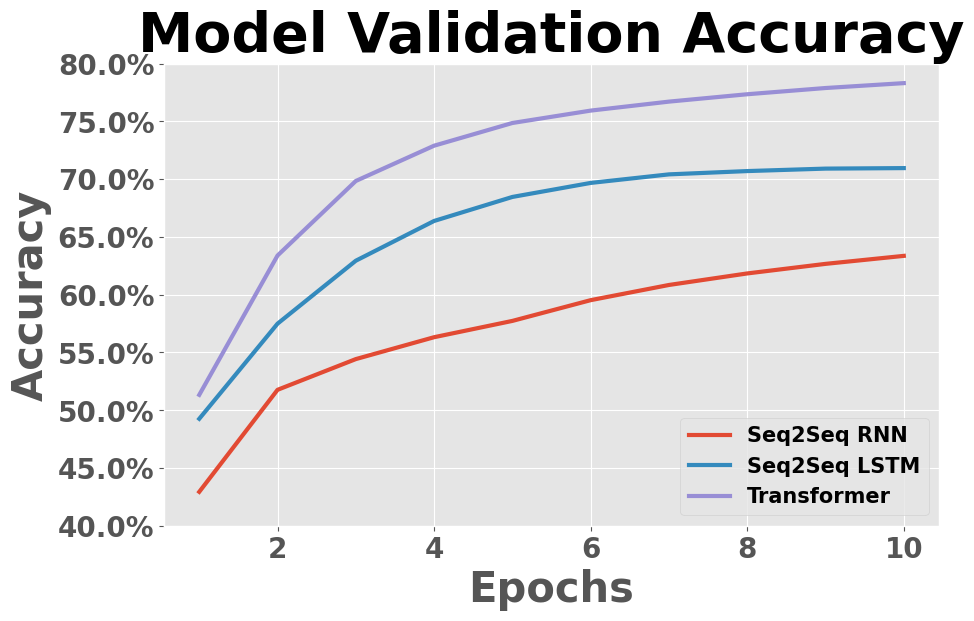

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set the style to ggplot
plt.style.use('ggplot')

# Assuming history_rnn, history_lstm, and history contain the training history of each model
val_accuracy_rnn = history_rnn.history['accuracy']
val_accuracy_lstm = history_lstm.history['val_masked_accuracy']
val_accuracy_transformer = history.history['val_masked_accuracy']

epochs_range = range(1, len(val_accuracy_rnn) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, val_accuracy_rnn, label='Seq2Seq RNN', linewidth=3)
plt.plot(epochs_range, val_accuracy_lstm, label='Seq2Seq LSTM',linewidth=3)
plt.plot(epochs_range, val_accuracy_transformer, label='Transformer',linewidth=3)

plt.title('Model Validation Accuracy', fontsize=40, fontweight='bold')
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy', fontsize=30, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))  # Set formatter to 100% for 1.0

# Set the y-axis limit to 85%
plt.ylim(0.40, 0.80)

plt.legend(fontsize=15)

plt.show()




<ipython-input-39-742d408decc7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Runtime", y="Algorithm", data=data_sorted, palette=sorted_colors, alpha = 0.8)


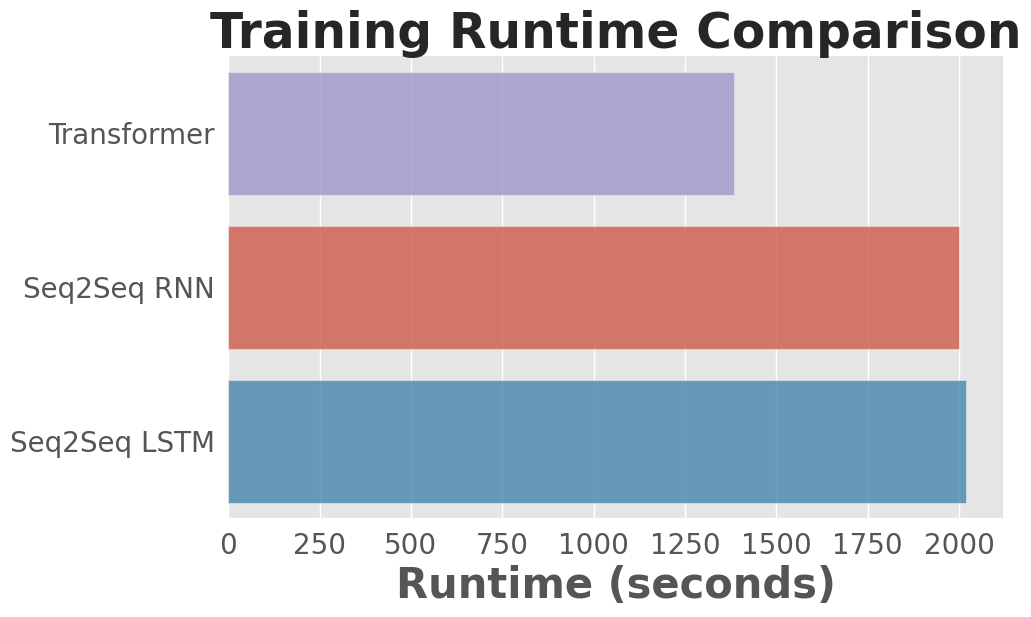

In [ ]:

# Set the style to ggplot
plt.style.use('ggplot')

# Data
times = [1998.66561961174, 2019.8179824352264, 1383.1599130630493]
algorithms = ['Seq2Seq RNN', 'Seq2Seq LSTM', 'Transformer']

# Create a DataFrame
data = pd.DataFrame({'Algorithm': algorithms, 'Runtime': times})

# Sort the DataFrame by Runtime in ascending order
data_sorted = data.sort_values('Runtime')

# Get the ggplot color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Manually set the colors based on sorted order
sorted_algorithms = data_sorted['Algorithm']
color_map = {'Seq2Seq RNN': colors[0], 'Seq2Seq LSTM': colors[1], 'Transformer': colors[2]}
sorted_colors = [color_map[alg] for alg in sorted_algorithms]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the runtimes using the sorted colors
sns.barplot(x="Runtime", y="Algorithm", data=data_sorted, palette=sorted_colors, alpha = 0.8)

# Set the title and labels with specific font sizes and weights
plt.title('Training Runtime Comparison', fontsize=35, fontweight='bold')
plt.xlabel('Runtime (seconds)', fontsize=30, fontweight='bold')
plt.ylabel('', fontsize=30, fontweight='bold')  # Remove y-label as Algorithm names are clear
plt.tick_params(axis='both', which='major', labelsize=20)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

plt.show()







## Testing Translations using the Transformer

In [ ]:
# Load the trained model
custom_objects = {"PositionalEmbedding": PositionalEmbedding,
                  "CustomSchedule": CustomSchedule,
                  "masked_loss": masked_loss,
                  "masked_accuracy": masked_accuracy}
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model("eng-fra-transformer.h5")

# training parameters used
seq_len = 20
vocab_size_en = 10000
vocab_size_fr = 20000

def translate(sentence):
    """Create the translated sentence"""
    enc_tokens = eng_vectorizer([sentence])
    lookup = list(fra_vectorizer.get_vocabulary())
    start_sentinel, end_sentinel = "[start]", "[end]"
    output_sentence = [start_sentinel]
    # generate the translated sentence word by word
    for i in range(seq_len):
        vector = fra_vectorizer([" ".join(output_sentence)])
        assert vector.shape == (1, seq_len+1)
        dec_tokens = vector[:, :-1]
        assert dec_tokens.shape == (1, seq_len)
        pred = model([enc_tokens, dec_tokens])
        assert pred.shape == (1, seq_len, vocab_size_fr)
        word = lookup[np.argmax(pred[0, i, :])]
        output_sentence.append(word)
        if word == end_sentinel:
            break
    return output_sentence

test_count = 20
for n in range(test_count):
    english_sentence, french_sentence = random.choice(test_pairs)
    translated = translate(english_sentence)
    print(f"Test {n}:")
    print(f"English Sentence: {english_sentence}")
    print(f"French Sentence: {french_sentence}")
    print(f"Predicted Translation: {' '.join(translated)}")
    print()

Test 0:
English Sentence: he referred to his past experience in his speech . 
French Sentence: [start] il se référa à son expérience passée dans son discours .  [end]
Predicted Translation: [start] il s ' est [UNK] à son expérience de son numéro d ' expérience . [end]

Test 1:
English Sentence: i just want to talk with you a little while . 
French Sentence: [start] je veux juste m ' entretenir avec toi un petit moment .  [end]
Predicted Translation: [start] je veux juste vous parler un peu de temps . [end]

Test 2:
English Sentence: it never occurred to me that he might be an escaped prisoner . 
French Sentence: [start] il ne m ' est jamais venu à l ' esprit qu ' il pourrait être un prisonnier évadé .  [end]
Predicted Translation: [start] il ne m ' est jamais venu à l ' esprit qu ' il pourrait être un prisonnier . [end]

Test 3:
English Sentence: why did you come home so late ? 
French Sentence: [start] pourquoi es - tu rentré à la maison si tard  ?  [end]
Predicted Translation: [start